## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [24]:
app_train["age"] = app_test['DAYS_BIRTH']/365

In [28]:
# 每個 bin 的值的範圍大小相同
app_train["equal_range_age"] = pd.cut(app_train["age"], 10)
app_train["equal_range_age"].value_counts()

(34.781, 39.673]    6656
(39.673, 44.566]    6564
(29.889, 34.781]    6162
(44.566, 49.458]    5774
(49.458, 54.35]     5348
(54.35, 59.243]     5066
(24.996, 29.889]    4817
(59.243, 64.135]    4496
(64.135, 69.027]    1992
(20.055, 24.996]    1869
Name: equal_range_age, dtype: int64

In [29]:
# 每個 bin 的值的範圍大小相同(5)
app_train["fix_range_age"] = pd.cut(app_train["age"], list(range(10,95,5)))
app_train["fix_range_age"].value_counts()

(35, 40]    6827
(40, 45]    6631
(30, 35]    6280
(45, 50]    5846
(50, 55]    5481
(55, 60]    5081
(25, 30]    4985
(60, 65]    4467
(20, 25]    1872
(65, 70]    1274
(85, 90]       0
(80, 85]       0
(75, 80]       0
(70, 75]       0
(15, 20]       0
(10, 15]       0
Name: fix_range_age, dtype: int64

In [17]:
import seaborn as sns
#plt.style.use('seaborn')

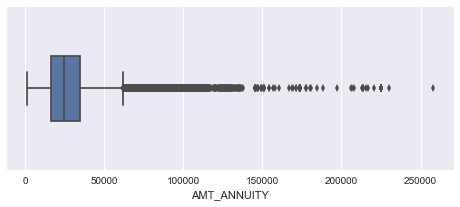

In [18]:
plt.figure(figsize=(8, 3))
sns.boxplot(app_train['AMT_ANNUITY'], width=0.4)

In [19]:
amt = app_train[['TARGET', 'AMT_ANNUITY']].copy()
amt["CUT_AMT_ANNUITY"] = pd.qcut(amt["AMT_ANNUITY"], q=10) 
amt = amt.sort_values(by='CUT_AMT_ANNUITY')
amt_grouped  = amt.groupby('CUT_AMT_ANNUITY').mean()
amt_grouped

,TARGET,AMT_ANNUITY
CUT_AMT_ANNUITY,,
"(1615.499, 11074.5]",0.071049,8554.818556
"(11074.5, 14701.5]",0.067914,13015.780488
"(14701.5, 18189.0]",0.084777,16504.117966
"(18189.0, 21865.5]",0.086883,20122.510787
"(21865.5, 24903.0]",0.084752,23306.579959
"(24903.0, 28062.0]",0.091069,26392.460831
"(28062.0, 32004.0]",0.100815,30100.798240
"(32004.0, 37516.5]",0.085983,34622.797396
"(37516.5, 45954.0]",0.076214,41227.115311


In [23]:
amt["CUT_AMT_ANNUITY"].value_counts()

(1615.499, 11074.5]    30880
(37516.5, 45954.0]     30808
(24903.0, 28062.0]     30790
(21865.5, 24903.0]     30772
(14701.5, 18189.0]     30763
(32004.0, 37516.5]     30762
(18189.0, 21865.5]     30731
(28062.0, 32004.0]     30690
(45954.0, 258025.5]    30676
(11074.5, 14701.5]     30627
Name: CUT_AMT_ANNUITY, dtype: int64